In [11]:
using Pkg
Pkg.activate(".")
using OptimalTransport
using LinearAlgebra
using SparseArrays
using Distances
using StatsBase
using NNlib
using BenchmarkTools
using NearestNeighbors
using RandomMatrix
using ParallelNeighbors
using ProgressMeter

include("../../src/util.jl")

  Activating project at `/data/gpfs/projects/punim0638/stephenz/QROT/notebooks/ex_algs`


norm_kernel (generic function with 1 method)

In [112]:
using DataFrames
using CSV
using Glob
using StatsPlots

dfs_time = []
dfs_bytes = []

for N in [1000, 5000, 10_000]
    files = Glob.glob("output/runtimes_*_N_$(N)_*.csv")
    _df = [CSV.read(x, DataFrame)[2:end, :] for x in files]
    push!(dfs_time, DataFrame(:Dense=> [mean(x.dense_time) for x in _df], :ActiveSet => [mean(x.sparse_time) for x in _df], :N => N))
    push!(dfs_bytes, DataFrame(:Dense=> [mean(x.dense_bytes) for x in _df], :ActiveSet => [mean(x.sparse_bytes) for x in _df], :N => N))
end

In [113]:
df_time = stack(vcat(dfs_time...));
df_bytes = stack(vcat(dfs_bytes...));

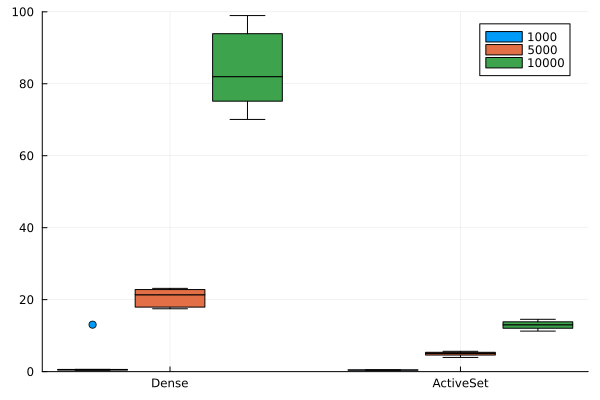

In [118]:
plot()
@df df_time groupedboxplot!(:variable, :value, group = :N; ylim = (0, 100))

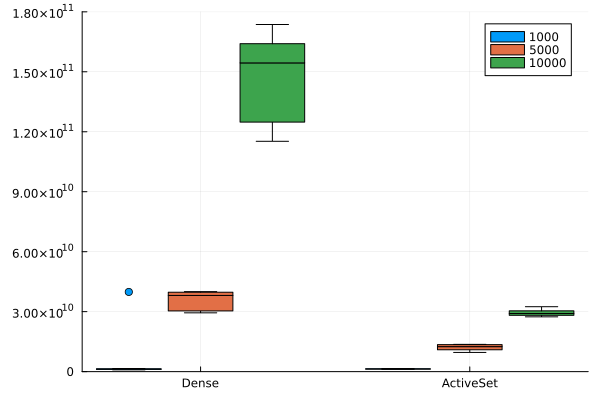

In [122]:
@df df_bytes groupedboxplot(:variable, :value, group = :N; ylim = (0, 1.8e11))